In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',200)

In [3]:
df = pd.read_csv('../data/data.csv')
df.head(1)

,track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time
0,1; Car; 33.82; 33.819575; 37.984242; 23.727558...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 1 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time  1983 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [5]:
csv_file = "../data/data.csv"
delimiter = ';'

with open(csv_file, 'r') as file:
    lines = file.readlines()
    # lines = lines[1:]
    # vehicle_information = 
    for line in lines:
        # line = line.strip('\n').strip(' ')
        print(line)
        break

track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time



In [6]:
with open(csv_file, 'r') as file:
    lines = file.readlines()
    # lines = lines[1:]
    vehicle_information = []
    trajectory_information = []
     # jumping the first line which is the header ['track_id', ' type', ' traveled_d', ' avg_speed', ' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time']
    lines = lines[1:]
    for line in lines:
        # removing the \n at the end of the line
        line = line.strip('\n').strip(' ')
        # splitting the contents based on ;
        contents = line.split(delimiter)
        # removing the white spaces
        contents = [contents[i].strip() for i in range(len(contents))]

        vehicle_information.append(contents[:4])

        k = 4 # skipping the first 4 columns which are track_id, type, traveled_d, avg_speed
        for i in range(k, len(contents),6):
            # concatenating the track_id with the trajectory information
            trajectory_information.append([contents[0],*contents[i:i+6]])

            
print(vehicle_information[0:5])
print(trajectory_information[0:50])

[['1', 'Car', '33.82', '33.819575'], ['2', 'Bus', '56.70', '5.933777'], ['3', 'Bus', '75.05', '7.719714'], ['4', 'Car', '68.13', '6.193265'], ['5', 'Car', '41.33', '9.183527']]
[['1', '37.984242', '23.727558', '22.1687', '2.0063', '0.1839', '0.000000'], ['1', '37.984241', '23.727555', '22.5001', '2.5968', '0.2089', '0.040000'], ['1', '37.984241', '23.727553', '22.9220', '3.2624', '0.2361', '0.080000'], ['1', '37.984240', '23.727550', '23.4343', '3.8528', '0.2758', '0.120000'], ['1', '37.984239', '23.727547', '24.0235', '4.3306', '0.3305', '0.160000'], ['1', '37.984238', '23.727545', '24.6734', '4.6955', '0.3994', '0.200000'], ['1', '37.984238', '23.727542', '25.3771', '5.0790', '0.4821', '0.240000'], ['1', '37.984237', '23.727540', '26.1429', '5.5569', '0.5803', '0.280000'], ['1', '37.984236', '23.727537', '26.9687', '5.9132', '0.6970', '0.320000'], ['1', '37.984236', '23.727535', '27.8215', '5.9314', '0.8332', '0.360000'], ['1', '37.984235', '23.727532', '28.6526', '5.6114', '0.9882',

In [7]:
df_vehicle = pd.DataFrame(data= vehicle_information,columns=['track_id','type','traveled_d','avg_speed'])

print(df_vehicle.shape)
df_vehicle.head(10)

(1983, 4)


,track_id,type,traveled_d,avg_speed
0,1,Car,33.82,33.819575
1,2,Bus,56.70,5.933777
2,3,Bus,75.05,7.719714
3,4,Car,68.13,6.193265
4,5,Car,41.33,9.183527
5,6,Car,105.94,9.729502
6,7,Bus,122.24,10.330500
7,8,Car,165.57,14.259299
8,9,Car,172.65,12.581749
9,10,Car,146.50,13.185282


In [8]:
df_trajectory = pd.DataFrame(data= trajectory_information ,columns=['track_id','lat','lon','speed','lon_acc','lat_acc','time'])

print(df_trajectory.shape)
df_trajectory.head(1000)

(3149376, 7)


,track_id,lat,lon,speed,lon_acc,lat_acc,time
0,1,37.984242,23.727558,22.1687,2.0063,0.1839,0.000000
1,1,37.984241,23.727555,22.5001,2.5968,0.2089,0.040000
2,1,37.984241,23.727553,22.9220,3.2624,0.2361,0.080000
3,1,37.984240,23.727550,23.4343,3.8528,0.2758,0.120000
4,1,37.984239,23.727547,24.0235,4.3306,0.3305,0.160000
...,...,...,...,...,...,...,...
995,3,37.984391,23.727853,15.4767,0.0836,-0.3374,1.640000
996,3,37.984391,23.727851,15.4885,0.0808,-0.3361,1.680000
997,3,37.984390,23.727850,15.4999,0.0778,-0.3342,1.720000
998,3,37.984390,23.727848,15.5109,0.0745,-0.3316,1.760000


In [9]:
df_trajectory.dropna(subset=['lat','lon','speed','lon_acc','time'],inplace=True)


In [10]:
# converting data types to proper format
df_vehicle['traveled_d'] = df_vehicle['traveled_d'].astype(float)
df_vehicle['avg_speed'] = df_vehicle['avg_speed'].astype(float)
df_vehicle.dtypes

track_id       object
type           object
traveled_d    float64
avg_speed     float64
dtype: object

In [11]:
df_trajectory['lat'] = df_trajectory['lat'].astype(float)
df_trajectory['lon'] = df_trajectory['lon'].astype(float)
df_trajectory['speed'] = df_trajectory['speed'].astype(float)
df_trajectory['lon_acc'] = df_trajectory['lon_acc'].astype(float)
df_trajectory['lat_acc'] = df_trajectory['lat_acc'].astype(float)
df_trajectory['time'] = df_trajectory['time'].astype(float)
df_trajectory.dtypes

track_id     object
lat         float64
lon         float64
speed       float64
lon_acc     float64
lat_acc     float64
time        float64
dtype: object

In [17]:
import os, sys
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from utils.db_util import DBConfig


In [20]:
db = DBConfig()
db.insert_vehicle_information_df_to_db(df_vehicle, 'vehicle_information')


In [21]:
db.insert_trajectory_df_to_db(df_trajectory, 'trajectory_information')


In [22]:
vehicle_information_from_database = db.read_data_from_db('vehicle_information')
trajectory_information_from_database =db.read_data_from_db('trajectory_information')


In [23]:
print(vehicle_information_from_database)


      track_id        type  traveled_d  avg_speed
0            1         Car       33.82  33.819575
1            2         Bus       56.70   5.933777
2            3         Bus       75.05   7.719714
3            4         Car       68.13   6.193265
4            5         Car       41.33   9.183527
...        ...         ...         ...        ...
1978      1979         Bus        6.33  18.997000
1979      1980         Car       12.37  44.540089
1980      1981         Car        4.34  39.069402
1981      1982  Motorcycle        5.46  49.180562
1982      1983        Taxi        1.96  17.608302

[1983 rows x 4 columns]


In [24]:
print(trajectory_information_from_database)

         track_id        lat        lon    speed  lon_acc  lat_acc    time
0               1  37.984242  23.727558  22.1687   2.0063   0.1839    0.00
1               1  37.984241  23.727555  22.5001   2.5968   0.2089    0.04
2               1  37.984241  23.727553  22.9220   3.2624   0.2361    0.08
3               1  37.984240  23.727550  23.4343   3.8528   0.2758    0.12
4               1  37.984239  23.727547  24.0235   4.3306   0.3305    0.16
...           ...        ...        ...      ...      ...      ...     ...
3147388      1983  37.983811  23.727537  19.5648   0.0000   0.0000  742.44
3147389      1983  37.983812  23.727539  19.5648   0.0000   0.0000  742.48
3147390      1983  37.983812  23.727542  19.5648   0.0000   0.0000  742.52
3147391      1983  37.983812  23.727544  19.5648   0.0000   0.0000  742.56
3147392      1983  37.983813  23.727546  19.5648   0.0000   0.0000  742.60

[3147393 rows x 7 columns]


In [25]:
df_vehicle.head(10)


,track_id,type,traveled_d,avg_speed
0,1,Car,33.82,33.819575
1,2,Bus,56.70,5.933777
2,3,Bus,75.05,7.719714
3,4,Car,68.13,6.193265
4,5,Car,41.33,9.183527
5,6,Car,105.94,9.729502
6,7,Bus,122.24,10.330500
7,8,Car,165.57,14.259299
8,9,Car,172.65,12.581749
9,10,Car,146.50,13.185282


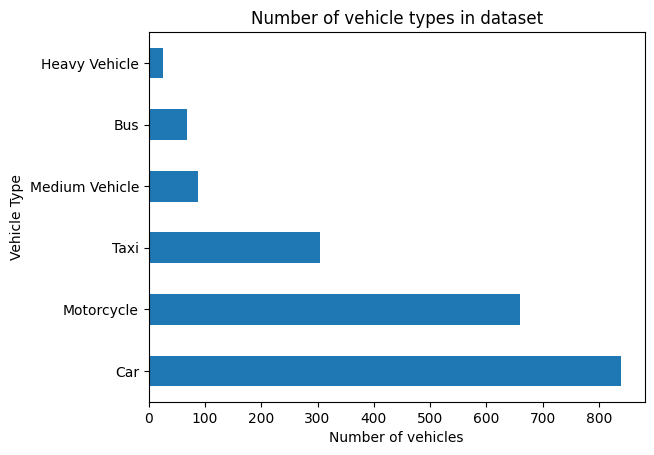

In [26]:
ax = df_vehicle.groupby('type')['type'].value_counts() \
    .sort_values(ascending=False) \
    .plot(kind='barh', title='Number of vehicle types in dataset')

ax.set_xlabel('Number of vehicles'); ax.set_ylabel('Vehicle Type');

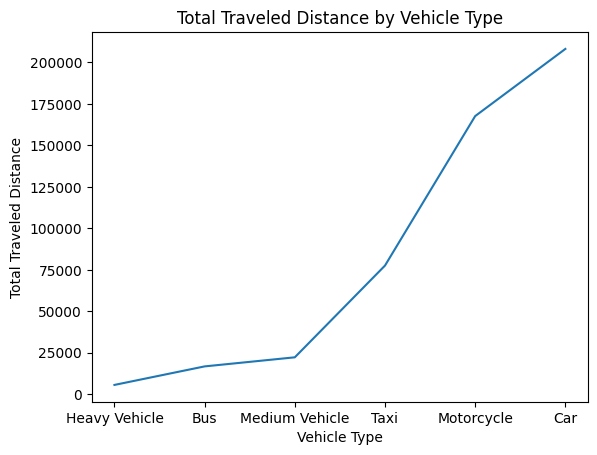

In [27]:
# group the data by type and plot the vehicles that traveled the longest distance overall
df_longest_travel = df_vehicle.groupby('type')['traveled_d'].sum().sort_values().reset_index()
plt.plot(df_longest_travel['type'], df_longest_travel['traveled_d'])
plt.xlabel('Vehicle Type')
plt.ylabel('Total Traveled Distance')
plt.title('Total Traveled Distance by Vehicle Type')
# increase the plot size
plt.rcParams["figure.figsize"] = (12, 5)

Text(0.5, 1.0, 'Average Speed by Vehicle Type')

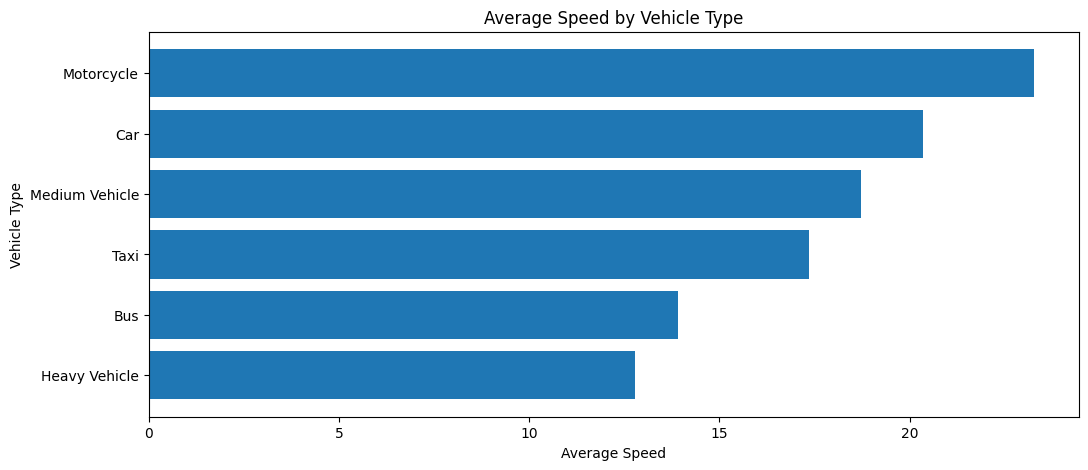

In [28]:
df_average_speed = df_vehicle.groupby('type')['avg_speed'].mean().sort_values().reset_index()
plt.barh(df_average_speed['type'], df_average_speed['avg_speed'])
plt.xlabel('Average Speed')
plt.ylabel('Vehicle Type')
plt.title('Average Speed by Vehicle Type')